In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment 3

In [4]:
!unzip "/content/drive/MyDrive/Dataset for Exp3/Dataset_2.zip"

Archive:  /content/drive/MyDrive/Dataset for Exp3/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [5]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [6]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [9]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [10]:
print(len(train_set))
print(len(test_set))

60000
10000


In [11]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6194232702255249. Accuracy: 76.3
Iteration: 1000. Loss: 0.5696229338645935. Accuracy: 80.75
Iteration: 1500. Loss: 0.3997284471988678. Accuracy: 80.89
Iteration: 2000. Loss: 0.6847843527793884. Accuracy: 83.43
Iteration: 2500. Loss: 0.4612507224082947. Accuracy: 83.19
Iteration: 3000. Loss: 0.3785364627838135. Accuracy: 83.45
Iteration: 3500. Loss: 0.21208664774894714. Accuracy: 84.62
Iteration: 4000. Loss: 0.2747194766998291. Accuracy: 84.97
Iteration: 4500. Loss: 0.31498831510543823. Accuracy: 85.38
Iteration: 5000. Loss: 0.12602560222148895. Accuracy: 85.93
Iteration: 5500. Loss: 0.2577868700027466. Accuracy: 85.74
Iteration: 6000. Loss: 0.4714871942996979. Accuracy: 86.32
Iteration: 6500. Loss: 0.41347965598106384. Accuracy: 86.5
Iteration: 7000. Loss: 0.3363909423351288. Accuracy: 85.81
Iteration: 7500. Loss: 0.5818409323692322. Accuracy: 87.08
Iteration: 8000. Loss: 0.18497294187545776. Accuracy: 86.7
Iteration: 8500. Loss: 0.5997304320335388. Accuracy: 87

[0.6194232702255249, 0.5696229338645935, 0.3997284471988678, 0.6847843527793884, 0.4612507224082947, 0.3785364627838135, 0.21208664774894714, 0.2747194766998291, 0.31498831510543823, 0.12602560222148895, 0.2577868700027466, 0.4714871942996979, 0.41347965598106384, 0.3363909423351288, 0.5818409323692322, 0.18497294187545776, 0.5997304320335388, 0.4600881040096283, 0.5529662370681763, 0.422873318195343, 0.18985410034656525, 0.09764933586120605, 0.6992474794387817, 0.06531579792499542, 0.37713858485221863, 0.1992914229631424, 0.3081088960170746, 0.2412889301776886, 0.3101022243499756, 0.6628847718238831, 0.2937820553779602, 0.29465287923812866, 0.6298394799232483, 0.14427617192268372, 0.22043797373771667, 0.6677015423774719]


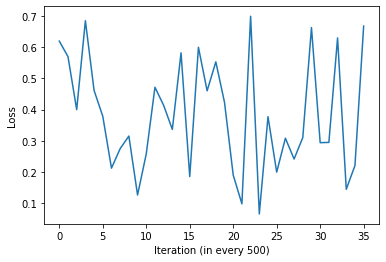

In [12]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [14]:
# Hyperparameters

#Batch Parameters
batch_size = 100
num_iters = 20000
input_dim = 28*28
num_hidden = 100
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



'''
MAKING DATASET ITERABLE
'''

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()


 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)


        
        
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

33
Iteration: 500. Loss: 2.303973913192749. Accuracy: 10.0
Iteration: 1000. Loss: 2.3035037517547607. Accuracy: 10.0
Iteration: 1500. Loss: 2.303156852722168. Accuracy: 10.04
Iteration: 2000. Loss: 2.3024442195892334. Accuracy: 10.0
Iteration: 2500. Loss: 2.302306890487671. Accuracy: 10.0
Iteration: 3000. Loss: 2.3022055625915527. Accuracy: 10.0
Iteration: 3500. Loss: 2.301917791366577. Accuracy: 10.0
Iteration: 4000. Loss: 2.302532911300659. Accuracy: 10.0
Iteration: 4500. Loss: 2.3017661571502686. Accuracy: 10.13
Iteration: 5000. Loss: 2.301816463470459. Accuracy: 10.0
Iteration: 5500. Loss: 2.3031508922576904. Accuracy: 10.0
Iteration: 6000. Loss: 2.3027429580688477. Accuracy: 10.0
Iteration: 6500. Loss: 2.3024420738220215. Accuracy: 10.0
Iteration: 7000. Loss: 2.3024039268493652. Accuracy: 10.0
Iteration: 7500. Loss: 2.3032615184783936. Accuracy: 10.0
Iteration: 8000. Loss: 2.301973342895508. Accuracy: 10.0
Iteration: 8500. Loss: 2.3028578758239746. Accuracy: 10.0
Iteration: 9000. 

[2.303973913192749, 2.3035037517547607, 2.303156852722168, 2.3024442195892334, 2.302306890487671, 2.3022055625915527, 2.301917791366577, 2.302532911300659, 2.3017661571502686, 2.301816463470459, 2.3031508922576904, 2.3027429580688477, 2.3024420738220215, 2.3024039268493652, 2.3032615184783936, 2.301973342895508, 2.3028578758239746, 2.302351474761963, 2.302647352218628, 2.3035175800323486, 2.3024816513061523, 2.3015902042388916, 2.302748203277588, 2.302398681640625, 2.3028175830841064, 2.303159475326538, 2.303687334060669, 2.3021936416625977, 2.3023154735565186, 2.3027403354644775, 2.301868438720703, 2.302154302597046, 2.3037188053131104, 2.301858425140381, 2.302699089050293, 2.302858352661133, 2.3022520542144775, 2.303328037261963, 2.3028197288513184]


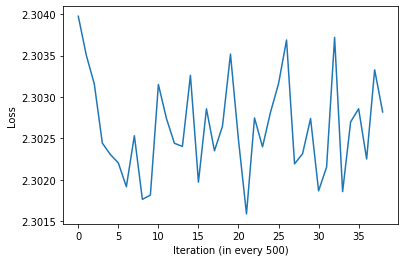

In [15]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()